/var/folders/qv/qpqwspdx2mn4zndqj91cxnkwzfytzl/T/ipykernel_7989/3835178539.py:240: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


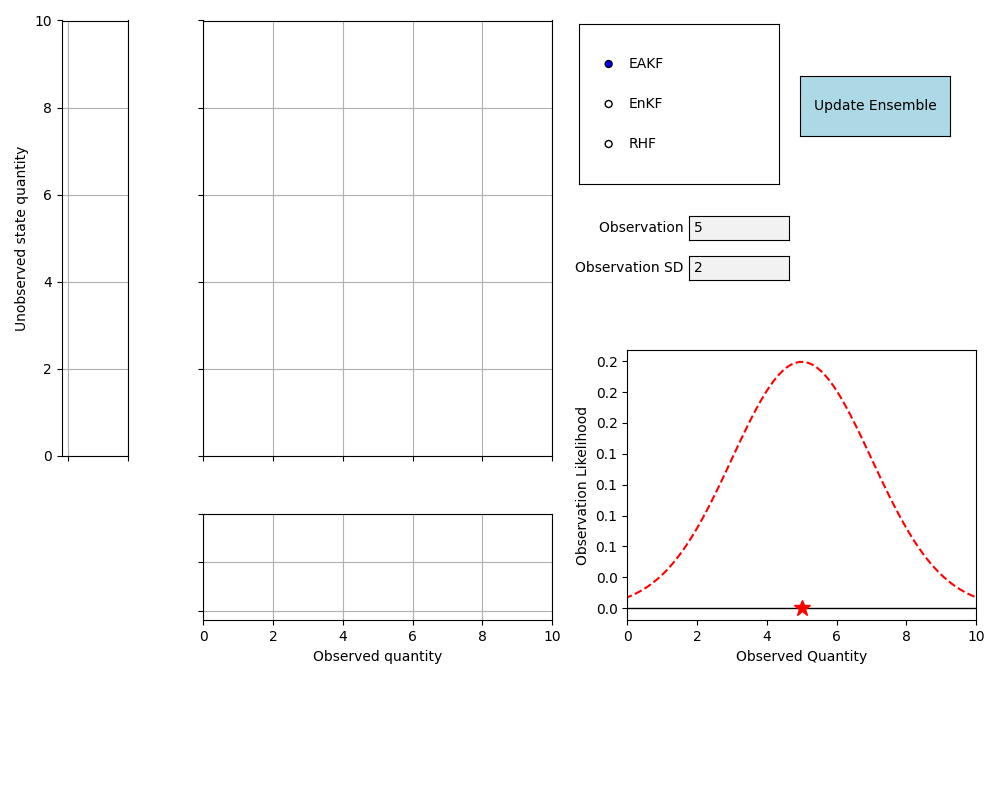

29

Clicked at x=2.2623672626998568, y=4.380113962613245
Clicked at x=4.813039816642067, y=3.966690458721449
Clicked at x=4.383151183955177, y=1.5320853802475431
Clicked at x=1.115997575534819, y=1.8995729392624723
Clicked at x=1.1733160598930716, y=3.1398434509378594
Clicked at x=5.529520871120215, y=2.17518860852367
Clicked at x=7.19175691750952, y=5.896000143549828
Clicked at x=5.644157839836718, y=7.205174572540513
Clicked at x=8.022874940704174, y=6.906590930840884
Clicked at x=7.564327065838158, y=8.146861442516268
Clicked at x=5.529520871120215, y=7.595630103993876
Clicked at x=7.707623276733787, y=7.274078489855813
Clicked at x=7.220416159688646, y=7.963117663008805


In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.widgets import Button
from matplotlib.widgets import TextBox
from matplotlib.widgets import RadioButtons
import numpy as np
from scipy.stats import norm

from matplotlib.ticker import FuncFormatter
%matplotlib widget

# Create figure
fig = plt.figure(figsize=(10, 8))
fig.canvas.header_visible = False

# Define GridSpec
gs = gridspec.GridSpec(5, 7, figure=fig)

# Create subplots of varying sizes and shapes
ax1 = fig.add_subplot(gs[0:3, 1:4]) # clicky main plot
ax2 = fig.add_subplot(gs[3, 1:4])   # Observered quantity
ax3 = fig.add_subplot(gs[0:3, 0])   # Unobserved state quantity
ax5 = fig.add_subplot(gs[2:4, 4:7]) # Marginal Distristribution of observation

ax5_position = ax5.get_position()
mu_intial = 5
sigma_initial = 2
mu = mu_intial
sigma = sigma_initial

# Customize each subplot
ax1.grid(True)
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)
#ax1.set_xticklabels([])
#x1.set_yticklabels([])

ax2.set_xlabel('Observed quantity')
ax2.grid(True)

# Adjust the position of the text boxes if necessary
mu_textbox_ax = plt.axes([ax5_position.x0+0.11, 0.7, 0.1, 0.03])
sigma_textbox_ax = plt.axes([ax5_position.x0+0.11, 0.65, 0.1, 0.03])

mu_textbox = TextBox(mu_textbox_ax, 'Observation ', initial=str(mu_intial))
sigma_textbox = TextBox(sigma_textbox_ax, 'Observation SD ', initial=str(sigma_initial))

# Update the update function to read from the TextBoxes
def update(val):
    global mu, sigma
    mu = float(mu_textbox.text)  # Convert text input to float
    sigma = float(sigma_textbox.text)  # Convert text input to float
    ax5.clear()  # Clear the previous plot
    plot_observation(ax5, mu, sigma)  # Re-plot the observation with the new parameters
    update_ensemble(None, mu, sigma)  # Update the ensemble with the new observation  #TODO this is not updating the ensemble
    plt.draw()  # Redraw the figure to reflect changes

# Connect the update function to the TextBoxes
mu_textbox.on_submit(update)
sigma_textbox.on_submit(update)
ax3.set_ylabel('Unobserved state quantity')
ax3.grid(True)

radio_ax = plt.axes([ax5_position.x0, 0.77, 0.2, 0.2])  # [left, bottom, width, height]

# Step 3: Create the RadioButtons widget
radio = RadioButtons(radio_ax, ('EAKF', 'EnKF', 'RHF'))
current_filter_selection = 'EAKF'

# Step 4: Define the event handler function
def handle_radio(label):
    global current_filter_selection 
    current_filter_selection = label
    if label == 'EAKF':
        # Handle Option 1
        print("EAKF selected")
    elif label == 'EnKF':
        # Handle Option 2
        print("EnKF selected")
    elif label == 'RHF':
        # Handle Option 3
        print("RHF selected")
    plt.draw()  # Update the plot if necessary

# Step 5: Connect the RadioButtons widget to the event handler
radio.on_clicked(handle_radio)

# Get the limits of ax1
x_limits_ax1 = ax1.get_xlim()
y_limits_ax1 = ax1.get_ylim()

# Set the limits of ax2, ax3 to match those of ax1
ax2.set_xlim(x_limits_ax1)
ax2.set_ylim(-0.1, 1)
ax2.set_yticklabels([])

ax3.set_xlim(-0.1, 1)
ax3.set_ylim(y_limits_ax1)
ax3.set_xticklabels([])

# Define a custom formatter function
def hide_negative_numbers(x, pos):
    """Hide negative numbers on an axis."""
    if x < 0:
        return ''
    return f'{x:.1f}'

# Observation
def plot_observation(ax, mu, sigma):
    # Define the normal distribution parameters
    #mu = 5  # mean
    #sigma = 1  # standard deviation

    # Generate x values
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

    # Compute y values for the normal distribution
    y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    ax.axhline(y=0, color='k', linestyle='-', linewidth=1)
    ax.set_xlim(x_limits_ax1)
    #ax.set_ylim(bottom=-0.1)  # this is also causing the top limit to be 1
    # Apply the custom formatter to the y-axis of ax3
    ax.yaxis.set_major_formatter(FuncFormatter(hide_negative_numbers))
    ax.plot(x,y, linestyle='--', color='r')
    ax.plot(mu, 0, 'r*', markersize=12)
    ax.set_xlabel('Observed Quantity')
    ax.set_ylabel('Observation Likelihood')

plot_observation(ax5, mu=mu_intial, sigma=sigma_initial)

# Create a button axes
button_ax = plt.axes([0.8, 0.83, 0.15, 0.075])  # [left, bottom, width, height]
button = Button(button_ax, 'Update Ensemble', color='lightblue', hovercolor='0.975')

# Define the event handler
def update_ensemble(event, mu=None, sigma=None):

# need to clear plots, but leave original clicked points, and observations or replot them each time.
   # Clear existing plots
    ax1.clear()
    ax2.clear()
    ax3.clear()
    ax5.clear()

    # Reapply necessary settings to the axes
    ax1.grid(True)
    ax1.set_xlim(0, 10)
    ax1.set_ylim(0, 10)
    #ax1.set_xticklabels([])
    #ax1.set_yticklabels([])
    ax2.set_xlabel('Observed quantity')
    ax2.grid(True)
    ax2.set_xlim(x_limits_ax1)
    ax2.set_ylim(-0.1, 1)
    ax2.set_yticklabels([])
    ax3.set_ylabel('Unobserved state quantity')
    ax3.grid(True)
    ax3.set_xlim(-0.1, 1)
    ax3.set_ylim(y_limits_ax1)
    ax3.set_xticklabels([])
    ax5.yaxis.set_major_formatter(FuncFormatter(hide_negative_numbers))


    # If mu and sigma are not provided, use the global values
    if mu is None or sigma is None:
        mu = globals().get('mu', 5)  # Default to 5 if not set
        sigma = globals().get('sigma', 2)  # Default to 2 if not set

    # Check if there are fewer than 2 clicked points
    if len(clicked_points) < 2:
        print("Need at least 2 points to update ensemble.")
        return  # Exit the function early

    # Rest of your function code follows...
    # Use zip and the * operator to unzip the list of tuples into two lists
    x_list, y_list = zip(*clicked_points)

    # Convert the tuples to lists 
    x_list = np.array(x_list)
    y_list = np.array(y_list)
    zeros_array = np.zeros(len(x_list))

    # plot the best fit line
    # Calculate the best fit line parameters: slope (m) and intercept (b)
    m, b = np.polyfit(x_list, y_list, 1)  # 1 means linear (first-degree polynomial)

    # Generate x values for the line: from the minimum to the maximum x value in clicked_points
    x_line = np.linspace(0, 10, 100)  # 100 points for a smooth line

    # Calculate corresponding y values based on the line equation y = mx + b
    y_line = m * x_line + b

    ax1.plot(x_list, y_list, 'go')
    ax2.plot(x_list, zeros_array, 'g*')
    ax3.plot(zeros_array, y_list, 'g*')
    ax5.plot(x_list, zeros_array, 'g*')
    # Plot the best fit line on ax1
    ax1.plot(x_line, y_line, 'g-', label='Best Fit Line')  

    plot_observation(ax5, mu, sigma)

    # Calculate the observation increments
    if current_filter_selection == 'EAKF':
       obs_increments = obs_increment_eakf(np.array(x_list), mu, sigma**2)
    elif current_filter_selection == 'EnKF':
       obs_increments = obs_increment_enkf(np.array(x_list), mu, sigma**2)
    elif current_filter_selection == 'RHF':
        obs_increments = obs_increment_rhf(np.array(x_list), mu, sigma**2)
    
    updated_x = x_list + obs_increments
    
    covar = np.cov(x_list, y_list)
    state_inc = obs_increments * covar[0, 1] / covar[0, 0]
    updated_y = y_list + state_inc   
   
    ax1.plot(updated_x, updated_y, 'b*')  # Plot the updated points
    z = [0.1] * len(updated_x) 
    dz = 1 / (len(updated_x) +1)
    z_plot = [element + dz*i for i, element in enumerate(z)]
    obs_z = [x * -0.1 for x in z_plot]
    
    # plot updated points on marginals
    ax2.plot(updated_x, z_plot, 'b*')
    ax3.plot(z_plot, updated_y, 'b*')
    ax5.plot(updated_x, obs_z, 'b*')
    

    # plot increment lines
    for i, _ in enumerate(updated_x):
        ax1.plot([x_list[i], updated_x[i]], [y_list[i], updated_y[i]], 'b-')
        ax2.plot([x_list[i], updated_x[i]], [z_plot[i], z_plot[i]], 'b-')
        ax3.plot([z_plot[i], z_plot[i]], [y_list[i], updated_y[i]], 'b-')
        ax5.plot([x_list[i], updated_x[i]], [obs_z[i], obs_z[i]], 'b-')

    plt.draw()  # Redraw the figure to reflect changes

# Connect the event handler
button.on_clicked(update_ensemble)

plt.tight_layout()
plt.show()

# Initialize an empty list to store the points
clicked_points = []

def on_click(event):
    # Check if the click was on ax1
    if event.inaxes == ax1:
        # Append the clicked point (xdata, ydata) to the list
        clicked_points.append((event.xdata, event.ydata))
        print(f"Clicked at x={event.xdata}, y={event.ydata}")
        # Plot the click coordinates on ax1
        ax1.plot(event.xdata, event.ydata, 'go')  # 'ro' plots a red dot
        ax2.plot(event.xdata, 0, 'g*')
        ax3.plot(0, event.ydata, 'g*')
        ax5.plot(event.xdata, 0, 'g*')
        plt.draw()  # Update the plot with the new point

# Connect the event handler to the figure
fig.canvas.mpl_connect('button_press_event', on_click)


In [1]:
class InvalidVarianceError(Exception):
    """Exception raised for errors in the input variance."""
    pass

def obs_increment_eakf(ensemble, observation, obs_error_var):
    """
    Computes increments for an ensemble adjustment Kalman filter (EAKF).

    Parameters:
    - ensemble: numpy array representing the ensemble of prior state estimates.
    - observation: scalar representing the observation.
    - obs_error_var: scalar representing the observation error variance.

    Raises:
    - InvalidVarianceError: If both prior and observation error variance are <= 0.

    Returns:
    - obs_increments: numpy array representing the observation increments.
    """
    # Compute prior ensemble mean and variance
    prior_mean = ensemble.mean()
    prior_var = np.var(ensemble, ddof=1)  # ddof=1 for sample variance
    
    # If both prior and observation error variance are 0, raise an exception
    if prior_var <= 0 and obs_error_var <= 0:
        raise InvalidVarianceError("Both prior variance and observation error variance are non-positive.")

    # Compute the posterior mean and variance
    if prior_var == 0:
        post_mean = prior_mean
        post_var = 0
    elif obs_error_var == 0:
        post_mean = observation
        post_var = 0
    else:
        post_var = 1 / (1 / prior_var + 1 / obs_error_var)
        post_mean = post_var * (prior_mean / prior_var + observation / obs_error_var)


    # Shift the prior ensemble to have the posterior mean
    updated_ensemble = ensemble - prior_mean + post_mean
   
    # Contract the ensemble to have the posterior variance
    if prior_var > 0:  # Avoid division by zero
        var_ratio = post_var / prior_var
        updated_ensemble = (updated_ensemble - post_mean) * np.sqrt(var_ratio) + post_mean
        
    # Compute the increments
    obs_increments = updated_ensemble - ensemble
    
    return obs_increments


def obs_increment_enkf(ensemble, observation, obs_error_var):
    """
    Computes increments for an ensemble Kalman filter with perturbed obs mean correction.

    Parameters:
    - ensemble: numpy array representing the ensemble of prior state estimates.
    - observation: scalar representing the observation.
    - obs_error_var: scalar representing the observation error variance.

    Raises:
    - InvalidVarianceError: If both prior and observation error variance <= 0.

    Returns:
    - obs_increments: numpy array representing the observation increments.
    """
    # Compute prior ensemble mean and variance
    prior_mean = np.mean(ensemble)
    prior_var = np.var(ensemble, ddof=1)  # ddof=1 for sample variance

    # If both prior and observation error variance are zero raise InvalidVarianceError
    if prior_var <= 0 and obs_error_var <= 0:
        raise InvalidVarianceError("Both prior and observation error variance are <=0.")

    # Compute the posterior mean and variance
    if prior_var == 0:
        post_mean = prior_mean # not used
        post_var = 0
    elif obs_error_var == 0:
        post_mean = observation # not used
        post_var = 0
    else:
        # Use product of gaussians
        post_var = 1 / (1 / prior_var + 1 / obs_error_var)
        post_mean = post_var * (prior_mean / prior_var + observation / obs_error_var) # not used

    # Generate the perturbed observations by adding draw from Normal(0, obs_error_var)
    temp_obs = observation + np.sqrt(obs_error_var) * np.random.randn(*ensemble.shape)

    # Adjust so that perturbed observations have mean = to observation
    temp_obs = temp_obs - np.mean(temp_obs) + observation

    # Compute new ensemble members by taking product of prior ensemble members and perturbed obs pairs
    updated_ens = post_var * (ensemble / prior_var + temp_obs / obs_error_var)

    # Increments are difference between updated and original ensemble
    obs_increments = updated_ens - ensemble

    return obs_increments

def obs_increment_rhf(ensemble, observation, obs_error_var):
    """
    Computes increments for a rank histogram filter.
    """
    
    # Get the ensemble size
    ens_size = ensemble.shape[0]
    prior_sd = np.std(ensemble)
    prior_var = prior_sd**2 # not used

    # Allocate space for likelihood density calculations
    like_dense = np.zeros(ens_size)
    mass = np.zeros(ens_size)
    height = np.zeros(ens_size)

    # Sort the ensemble members and keep the indices
    x, e_ind = np.sort(ensemble), np.argsort(ensemble)

    # Compute the likelihood of each member given the observation
    like = np.exp(-1 * (x - observation)**2 / (2 * obs_error_var))

    # Compute the mean likelihood density in each interior bin
    like_dense[1:] = (like[:-1] + like[1:]) / 2

    # For unit normal, find distance from mean to where cdf is 1/(n+1)
    dist_for_unit_sd = -1 * weighted_norm_inv(1, 0, 1, 1 / (ens_size + 1))

    # Variance of tails is just sample prior variance
    # Mean is adjusted so that 1/(ens_size + 1) is outside
    left_mean = x[0] + dist_for_unit_sd * prior_sd
    left_var = prior_var
    left_sd = prior_sd

    # Same for the right tail
    right_mean = x[-1] - dist_for_unit_sd * prior_sd
    right_var = prior_var
    right_sd = prior_sd
    
    # Flat tails for likelihood

    # left tail
    new_sd_left  = left_sd 
    new_mean_left = left_mean 
    prod_weight_left = like[0] / (ens_size + 1)
    mass[0] = like[0] / (ens_size + 1)

    # right tail
    new_sd_right = right_sd
    new_mean_right = right_mean
    prod_weight_right = like[-1]
    mass[-1] = like[-1] / (ens_size + 1)


    # The mass in each interior box is the height times the width
    # The height of the likelihood is like_dense
    # For the prior, mass is 1 / ((n+1) width), and mass = height x width so
    # The height of the prior is 1 / ((n+1) width); Multiplying by width leaves 1/(n+1)
    # In prior, have 1/(n+1) mass in each bin, multiply by mean likelihood
    # density to get approximate mass in updated bin

    for i in range(1, ens_size):
        mass[i] = like_dense[i] / (ens_size + 1)
        if x[i] == x[i-1]:
            height[i] = -1
        else:
            height[i] = 1 / ((ens_size + 1) * (x[i] - x[i-1]))

    # Normalize the mass to get a pdf
    mass_sum = np.sum(mass)
    nmass = mass / mass_sum

    # Get the weight for the final normalized tail gaussians
    # This is the same as left_amp=(ens_size + 1)*nmass(1)
    left_amp = prod_weight_left / mass_sum
    # This is the same as right_amp=(ens_size + 1)*nmass(ens_size+1)
    right_amp = prod_weight_right / mass_sum

    # Find cumulative mass at each box boundary
    cumul_mass = np.zeros(ens_size + 1)
    cumul_mass[1:] = np.cumsum(nmass)

    # Begin internal box search at bottom of lowest box
    new_ens = np.zeros(ens_size)
    obs_increments = np.zeros(ens_size)
    lowest_box = 1

    # Find each new ensemble member's location
    for i in range(ens_size):
        # Each update ensemble member has 1/(n+1) mass before it
        umass = (i + 1) / (ens_size + 1)
        
        # If it is in the inner or outer range have to use normal
        if umass < cumul_mass[1]:
            # It is in the left tail
            # Get position of x in weighted gaussian where the cdf has value umass
            new_ens[i] = weighted_norm_inv(left_amp, new_mean_left, new_sd_left, umass)
        elif umass > cumul_mass[ens_size]:
            # It's in the right tail
            # Get the position of x in weighted gaussian where the cdf has value umass
            new_ens[i] = weighted_norm_inv(right_amp, new_mean_right, new_sd_right, 1 - umass)
            # Coming in from the right, use symmetry after pretending it's on left
            new_ens[i] = new_mean_right + (new_mean_right - new_ens[i])
        else:
            # In one of the inner boxes
            for j in range(lowest_box, ens_size):
                # Find the box that this mass is in
                if cumul_mass[j + 1] <= umass <= cumul_mass[j + 2]:
                    # Linearly interpolate in mass
                    new_ens[i] = x[j] + ((umass - cumul_mass[j + 1]) / (cumul_mass[j + 2] - cumul_mass[j + 1])) * (x[j + 1] - x[j])
                    lowest_box = j
                    break

    # Convert to increments for unsorted
    for i in range(ens_size):
        obs_increments[e_ind[i]] = new_ens[i] - x[i]

    return obs_increments

def weighted_norm_inv(alpha, mean, sd, p):
    """
    Find the value of x for which the cdf of a N(mean, sd)
    multiplied times alpha has value p.
    """
    np = p / alpha
    x = norm.ppf(np)
    x = mean + x * sd
    return x

